<a href="https://colab.research.google.com/github/MarleneChevalier/Deep-Learning/blob/master/Projet_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep Learning : Mise en application  
====================================
Marlène Chevalier - Executive Master Statistique et Big Data

Septembre 2020 

Sujet
====
Il s'agit d'un mini projet, sous forme d'un rapport expliquant les résultats obtenus à partir des méthodes de deep learning vues en cours.

**Les données choisies**  
Il s'agit de données concernant la consommation d'énergie dans un immeuble à basse consommation. Le fichier a été extrait de kaggle et vient de l'université de Mons (Belgique) : *KAG_energydata_complete.csv*.  
https://www.kaggle.com/loveall/appliances-energy-prediction  

Il est constitué de 19735 lignes qui constituent chacune un enregistrement de mesures faites entre janvier et mai 2016 sur 29 variables : 
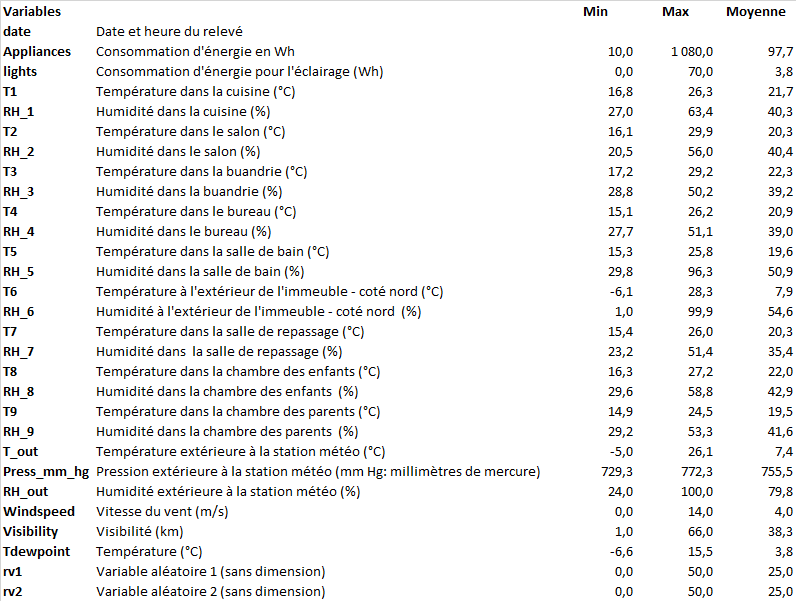   

Il n'y a pas de valeurs manquantes.


Librairies utilisées
====================================
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$
$\newcommand{\eqdef}{\equiv}$

In [1]:
%matplotlib inline
import numpy as np # fonctions de calcul
import matplotlib.pyplot as plt # graphiques
import matplotlib.cm as cm
import seaborn as sns
import pandas as pd # chargement des données
import datetime # gestion des dates
import sklearn as sl # optimisation 
import sklearn.linear_model as skl # optimisation
import sklearn.metrics as sklmet # optimisation
import test as t
import tensorflow as tf  # réseaux de neurones
import tensorflow.keras as ks # réseaux de neurones
import keras.models as km # réseaux de neurones
import keras.layers as kl # réseaux de neurones
import keras.utils as ku # réseaux de neurones
import keras.metrics as kt # réseaux de neurones
%reload_ext autoreload
%autoreload 2

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Préparation des données
====================================


__Chargement des données__

In [2]:
#Fonction pour chargement via google collab
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authentification Google
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#Chargement de la base de données
id = '1FzqPcY8SVGV5etGI1rNM0bBc8n1btGGV'
downloaded = drive.CreateFile({'id': '1FzqPcY8SVGV5etGI1rNM0bBc8n1btGGV'})
downloaded.GetContentFile('KAG_energydata_complete.csv')


In [3]:
data_energy = pd.read_csv('KAG_energydata_complete.csv')

__Distribution de la consommation électrique__

Consommation électrique moyenne :  97.7 W/h
Ecart type : 102.5
Consommation électrique médiane : 60.0 W/h


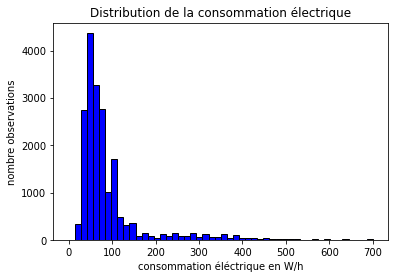

In [4]:
plt.hist(data_energy['Appliances'], range = (0, 700), bins = 50, color = 'blue',
            edgecolor = 'black')
plt.xlabel('consommation éléctrique en W/h')
plt.ylabel('nombre observations')
plt.title('Distribution de la consommation électrique')
print('Consommation électrique moyenne : ',round(np.mean(data_energy['Appliances']),1),'W/h')
print('Ecart type :',round(np.std(data_energy['Appliances']),1))
print('Consommation électrique médiane :',round(np.quantile(data_energy['Appliances'], 0.5),3),'W/h')

La consommation éléctrique est fortement concentrée entre 30 et 80 Wh, avec une valeur médiane à 60Wh.

__Corrélations des variables du jeu de données__

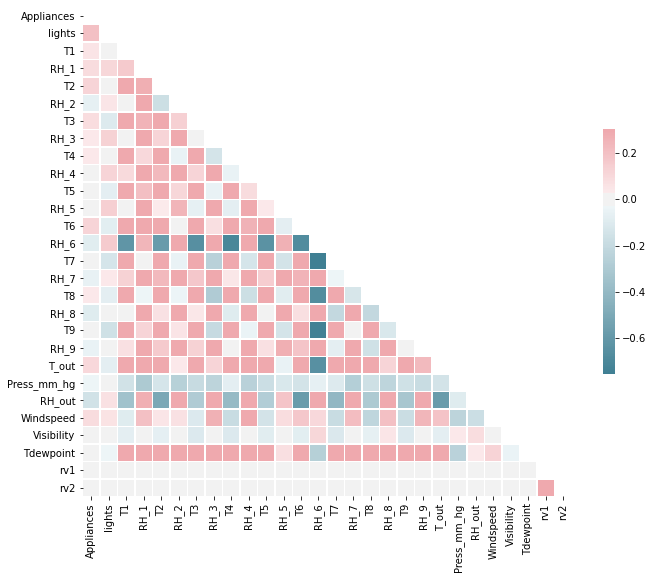

In [5]:
# Calcul des corrélations
corr = data_energy.corr()
# Masque triangle du graphique
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Parametres graphiques
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Tracé du graphe
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

Il apparait de fortes corrélations : 
* entre les taux d'humidité extérieur et les mesures de température (RHT et T1 à T9): corrélations négatives 
* entre les températures entre elles (T1 à T9) : corrélation positive  
* entre la mesure de température (Tdewpoint) et les autres températures ainsi que les taux d'humidité

Aucune corrélation entre les variables aléatoires rv1 et rv2 et le reste des variables.

__Création de variables catégorielles de la consommation électrique__

Nous définissons une variable catégorielle, Appliances_cat, indiquant le niveau de consommation en électricité. 
Si la consommation enregistrée est : 
* inférieure à la  borne de sous-consommation, Appliances_cat = 0 
* entre les 2 bornes (sousconso,surconso), Appliances_cat = 1
* supérieure à la  borne de sur-consommation, Appliances_cat = 2

borne de sous-consommation = consommation moyenne mensuelle - écart type de la consommation mensuelle. 

borne de sur-consommation = consommation moyenne mensuelle + écart type de la consommation mensuelle.

Les consommations moyennes et écarts-types ( ainsi que les quantiles à 25%, 50% et à 75%) sont calculés pour chaque mois.

Nous inserons dans le jeu de données les nouvelles variables calculées.

In [6]:
# conversion du champs date en type date et extraction du mois et année 
data_energy['date'] = pd.to_datetime(data_energy['date'], errors='coerce')
data_energy['month'] = data_energy['date'].dt.month

# consommation électrique par mois : moyenne, 1er et 3eme quantiles et écart type
mean_conso = data_energy.groupby('month').mean()
std_conso = data_energy.groupby('month').std() 
S_sousconso = mean_conso-std_conso
S_surconso = mean_conso+std_conso
q25_conso=data_energy.groupby('month').quantile(q=0.25)
q50_conso=data_energy.groupby('month').quantile(q=0.5)
q75_conso=data_energy.groupby('month').quantile(q=0.75)

# creation d'un data frame des seuils de consommation
df_surconso = pd.DataFrame(S_surconso)
df_sousconso = pd.DataFrame(S_sousconso)
df_meanconso = pd.DataFrame(mean_conso)
df_stdconso = pd.DataFrame(std_conso)
df_q25=pd.DataFrame(q25_conso)
df_q50=pd.DataFrame(q50_conso)
df_q75=pd.DataFrame(q75_conso)
df2=pd.DataFrame()
df2['mean_conso'] = df_meanconso['Appliances']
df2['std_conso'] = df_stdconso['Appliances']
df2['surconso'] = df_surconso['Appliances']
df2['sousconso'] = df_sousconso['Appliances']
df2['q25_conso'] = df_q25['Appliances']
df2['q50_conso'] = df_q50['Appliances']
df2['q75_conso'] = df_q75['Appliances']
df2
# fusion des seuils de consommation avec le jeu de données
dftot=pd.DataFrame()
dftot=pd.merge(data_energy, df2,on = ['month'])

# Creation de la variable consommation catégorielle
for i in range(len(dftot['sousconso'])):
    if dftot['sousconso'][i]<0:
        dftot['sousconso'][i]=0
dftot['Appliances_cat']= 1
for i in range(len(dftot['Appliances'])):
    if dftot['Appliances'][i] < dftot['sousconso'][i]: 
        dftot['Appliances_cat'][i] = 0
    if dftot['Appliances'][i] > dftot['surconso'][i]:
        dftot['Appliances_cat'][i] = 2
print('dimension du jeu de données complété ', dftot.shape)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


dimension du jeu de données complété  (19735, 38)


__Séparation du jeu de données complet en un jeu d'apprentissage (80%) et un jeu de test (20%)__

Le jeu d'apprentissage sera utilisé pour construire le modèle, le jeu test pour tester les performance prédictive du modèle.  

In [7]:
from sklearn.model_selection import train_test_split
# Générer l'ens de training. Fixer random_state pour répliquer les resultats ultérieurement.
train = dftot .sample(frac=0.8, random_state=1)
# Sélectionner tout ce qui n'est pas dans le set de training et le mettre dans le set de test.
test = dftot.loc[~dftot.index.isin(train.index)]
# Afficher les dimensions des 2 sets.
print('dimension ensemble apprentisssage ', train.shape)
print('dimension ensemble test ',test.shape)

dimension ensemble apprentisssage  (15788, 38)
dimension ensemble test  (3947, 38)


__Séparer les features $X$ de la variable à prédire $Y$ (Appliances) dans les ensembles d'apprentissage et de test__  

Nous conservons dans la matrice de design (features $X$ ) toutes les covariables hormis la date/heureles , 2 variables aléatoires (dont la signification n'est pas connue) et les variables moyenne , ecart type, quantiles, seuil créés plus haut.

Deux variables réponse sont isolées : la consommation éléctrique en Wh (Aplliances) et celle crée en catégorielle plus haut(Appliances_cat).


In [8]:
[n,p] = dftot.shape

# separer la variable à prévoir (Y : Appliances et Ycat : Appliances_cat) et des variables prédictives (X) 

# ensembles apprentissage et test pour la variable à predire
Y_train = train['Appliances'] # variable reponse
Y_test = test['Appliances'] # variable reponse
Ycat_train = train['Appliances_cat'] # variable reponse catégorielle
Ycat_test = test['Appliances_cat'] # variable reponse catégorielle

# ensembles apprentissage et test des variables prédictives
X = dftot
X_train = train 
X_test = test
X_train.drop(['Appliances', 'date', 'rv1','rv2','mean_conso','std_conso','surconso','sousconso','q25_conso','q50_conso','q75_conso','Appliances_cat'], axis=1,inplace=True) # variables features training
X_test.drop(['Appliances', 'date', 'rv1','rv2','mean_conso','std_conso','surconso','sousconso','q25_conso','q50_conso','q75_conso','Appliances_cat'], axis=1,inplace=True) # variables features test

[n_train,p_train] = X_train.shape
[n_test,p_test] = X_test.shape

# affichage des dimensions des matrices de design
print('la matrice de design complète contient: ',n,'lignes et ',p,'variables explicatives')
print('la matrice de design d apprentissage contient: ',n_train,'lignes et ',p_train,'variables explicatives')
print('la matrice de design test contient: ',n_test,'lignes et ',p_test,'variables explicatives')

la matrice de design complète contient:  19735 lignes et  38 variables explicatives
la matrice de design d apprentissage contient:  15788 lignes et  26 variables explicatives
la matrice de design test contient:  3947 lignes et  26 variables explicatives


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


__Normalisation des variables par la moyenne et l'écart type de l'ensemble d'apprentissage__

Variables normalisées dans les ensembles d'apprentissage et test : variables explicatives (matrice design X) et variable réponse en Wh (Y : Appliances).

In [9]:
#Normalisation des matrices de design d'apprentissage et de test
mX_train = X_train.mean(axis=0)
sX_train = X_train.std(axis=0)
X_train = (X_train-mX_train)/sX_train
X_test= (X_test-mX_train)/sX_train

In [10]:
#Normalisation des vecteurs d'apprentissage et de test de la variable consommation électrique en Wh (Y)
mY_train = Y_train.mean()
sY_train = Y_train.std()
Y_train = (Y_train-mY_train)/sY_train 
Y_test = (Y_test-mY_train)/sY_train 

__Transformation de la variable réponse catégorielle en variables indicatrices__

La variable "niveau de consommation électrique" créée plus haut (Y_cat), prenant les valeurs (0,1,2) est divisées en 3 variables indicatrices.

In [11]:
#Transformation de la variable reponse catégorielle en variables indicatrices
Y_catind_train=ku.to_categorical(Ycat_train)
Y_catind_test=ku.to_categorical(Ycat_test)

Apprentissage par réseau de neurone
====================================
Nous allons maintenant utiliser les techniques de Deep Learning pour créer un modèle qui permettra la prévision de la consommation électrique à partir des 26 variables explicatives à disposition.

La modélisation passera par 5 étapes :
*  Création du réseau de neurones : définition de la structure du modèle
*  Compilation de l'algorithme d'apprentissage : détermination de la fonction de perte, du mode d'optimisation, de la métrique de contrôle de qualité.
* Apprentissage : itérations de l'algorithme sur le jeu d'apprentissage
* Prédiction sur le jeu de données test
* Performance du modèle : évaluation de l'écart entre la prédiction et la vraie valeur


In [26]:
#Création du réseau de neurones
model_Ycat=km.Sequential()
from keras.layers import Dense
model_Ycat.add(Dense(units=3, input_dim=26,activation="sigmoid"))
model_Ycat.add(Dense(units=3, activation="sigmoid"))

#Compilation
model_Ycat.compile(loss="binary_crossentropy",optimizer="sgd",metrics="accuracy")

#Apprentissage
modelfit=model_Ycat.fit(X_train, Y_catind_train,epochs=30,batch_size=10)


Epoch 1/30
1579/1579 [==============================] - 1s 905us/step - loss: 0.3615 - accuracy: 0.8803
Epoch 2/30
1579/1579 [==============================] - 1s 932us/step - loss: 0.2398 - accuracy: 0.9015
Epoch 3/30
1579/1579 [==============================] - 1s 942us/step - loss: 0.2239 - accuracy: 0.9015
Epoch 4/30
1579/1579 [==============================] - 1s 944us/step - loss: 0.2179 - accuracy: 0.9015
Epoch 5/30
1579/1579 [==============================] - 1s 938us/step - loss: 0.2143 - accuracy: 0.9015
Epoch 6/30
1579/1579 [==============================] - 1s 939us/step - loss: 0.2118 - accuracy: 0.9015
Epoch 7/30
1579/1579 [==============================] - 2s 965us/step - loss: 0.2098 - accuracy: 0.9015
Epoch 8/30
1579/1579 [==============================] - 2s 963us/step - loss: 0.2081 - accuracy: 0.9015
Epoch 9/30
1579/1579 [==============================] - 2s 994us/step - loss: 0.2067 - accuracy: 0.9015
Epoch 10/30
1579/1579 [==============================] - 2s 982u

Ajustement du parametrage du réseau de neurone

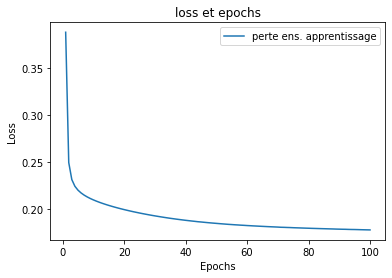

In [21]:
# Parametre du modèle
# graphique loss / epochs
plt.clf()
loss=modelfit.history['loss']
#val_loss=modelfit.history['val_loss']
epochs=range(1,len(loss)+1)

plt.plot(epochs,loss,label='perte ens. apprentissage')
#plt.plot(epochs,val_loss,'b',label='perte ens. test')
plt.title('loss et epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

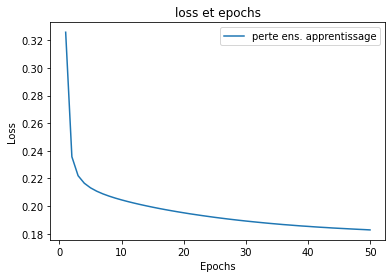

In [23]:
# Parametre du modèle
# graphique loss / epochs
plt.clf()
loss=modelfit.history['loss']
#val_loss=modelfit.history['val_loss']
epochs=range(1,len(loss)+1)

plt.plot(epochs,loss,label='perte ens. apprentissage')
#plt.plot(epochs,val_loss,'b',label='perte ens. test')
plt.title('loss et epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

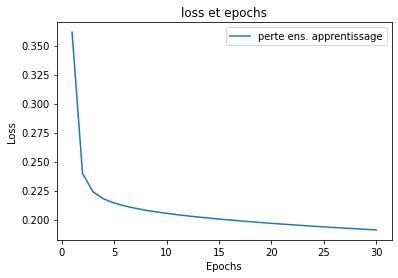

In [27]:
# Parametre du modèle
# graphique loss / epochs
plt.clf()
loss=modelfit.history['loss']
#val_loss=modelfit.history['val_loss']
epochs=range(1,len(loss)+1)

plt.plot(epochs,loss,label='perte ens. apprentissage')
#plt.plot(epochs,val_loss,'b',label='perte ens. test')
plt.title('loss et epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
# Prédiction
Y_pred=model_Ycat.predict(X_test)
# prediction sous forme de (0,1)
for i in range(len(Y_pred)):
    for j in range(3):
        if (Y_pred[i][j]<0.5):
           (Y_pred[i][j]) =0
        else: 
            (Y_pred[i][j]) = 1
    
# matrice de confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_pred.argmax(axis=1),Y_catind_test.argmax(axis=1))
cm
y_pred = Y_pred.argmax(1)

# evaluation du modèle
#score=model_Ycat.evaluate(y_pred ,Ycat_test)
#print(score)